In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

In [2]:
N = 10000
sigma = 2
M = np.sqrt( 2 * np.pi * sigma * sigma ) * np.exp( 1 + np.pi*np.pi/(2*sigma*sigma))

In [3]:
def p_x(x):
  return np.exp(np.sin(x))

def q_x(x, mean, sigma):
  return 1/(sigma*np.sqrt(2*np.pi)) * np.exp( -1/2 * ((x - mean)/sigma)**2 )

In [4]:
# Rejection sampling algorithm
x = np.empty(N)

for i in range(N):
  while 1:
    x[i] = np.random.normal(0, sigma)

    if x[i] < -1*np.pi or x[i] > np.pi:
      continue
    
    u = np.random.uniform(0, M*q_x(x[i], 0, sigma))

    if u > p_x(x[i]):
      continue
    else:
      break

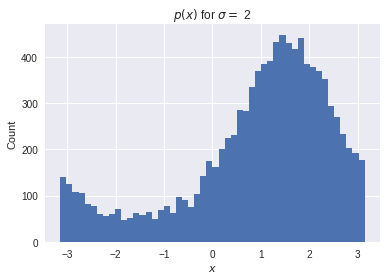

In [5]:
# f = plt.figure()
plt.hist(x, bins=50)
plt.title("$p(x)$ for $\sigma =$ " + str(sigma))
plt.xlabel("$x$")
plt.ylabel("Count")
plt.show()

# f.savefig("rejection_sampling.pdf", bbox_inches='tight')